## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
import pandas as pd
import numpy as np
import scipy.stats as scp

In [37]:
df = pd.read_csv('data/human_body_temperature.csv')

In [38]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [39]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [40]:
temp = df.temperature
temp.count()

130

In [41]:
tmean = temp.mean()
tmean

98.24923076923078

In [42]:
tsd = temp.std()
tsd

0.7331831580389454

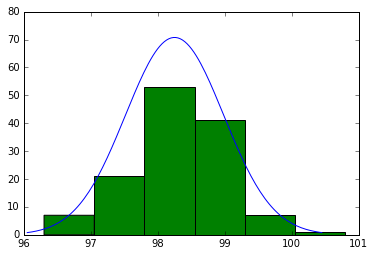

In [43]:
tsorted = temp.sort_values
thist = np.histogram(temp)
x = np.linspace(-3*tsd+tmean, 3*tsd+tmean, temp.count())
ntemp = mlab.normpdf(x, tmean, tsd)*temp.count()
plt.plot(x,ntemp)
plt.hist(temp,bins=6)
plt.show()

In [44]:
t1sd = temp[(temp>tmean-tsd) & (temp<tmean+tsd)]
prob1sd = len(t1sd)/len(temp)
prob1sd

0.6923076923076923

Should be 0.682689492137

In [45]:
delta1sd = prob1sd-0.682689492137
delta1sd

0.00961820017069226

In [46]:
t2sd = temp[(temp>tmean-2*tsd) & (temp<tmean+2*tsd)]
prob2sd = len(t2sd)/len(temp)
prob2sd

0.9461538461538461

Should be 0.954499736104

In [47]:
delta2sd = prob2sd- 0.954499736104
delta2sd

-0.00834588995015384

In [48]:
t3sd = temp[(temp>tmean-3*tsd) & (temp<tmean+3*tsd)]
prob3sd = len(t3sd)/len(temp)
prob3sd

0.9923076923076923

Should be 0.997300203937

In [49]:
delta3sd = prob3sd- 0.997300203937
delta3sd

-0.004992511629307694

Expected: 68.3-95.4-99.7, Actual: 69.2-94.6-99.2. Therefore, based on the empirical rule and plotting the histogram, this distribution appears normal.

Let's now consider whether the sample mean is equal to the population mean. 
We'll set up our null hypothesis to be $$H_{0} : \bar{x} = \mu$$ 

or the population mean is equal to the sample mean. The alternate hypothesis is then $$H_{1} : \bar{x} \neq \mu$$ 

The question we want to answer is whether 98.6 F can be the population mean.

Our sample standard deviation is 

In [50]:
tsd

0.7331831580389454

We do not know the population SD. Therefore we can approximate the population standard deviation by $$\frac{0.7332}{\sqrt{130}}$$

Also, since the number of samples is > 30, we may use a z-test. However, strictly speaking, when both the mean and SD are unknown, a t-test is recommended.

In [51]:
tpsd = tsd/np.sqrt(temp.count())
tpsd

0.06430441683789101

The T-statistic is 

In [52]:
tstat = (tmean - 98.6)/tpsd
tstat

-5.4548232923640789

On the other hand, to use the z-test, we would have been provided the SD for the population. In both the z- and t-tests, the statistic that is calculated is the same. However, the value used for the SD is different.

Using the one-sample t-test from scipy.stats, we can get the t-statistic (computed above also) and the p-value:

In [53]:
ttest_results = scp.ttest_1samp(temp, 98.6)
ttest_results

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We find that the p-value is 2e-7, which is too small for us to accept the null hypothesis, i.e. the proposed population mean (98.6F) is not equal to the true population mean.

Now, let's address the question of "normal" temperatures, given the data at hand. Since we have already estimated the population SD and we have been given the population mean to be 98.2 F, we can compute a 99% confidence interval, which will give us a range for the normal temperatures.

In [54]:
scp.norm.interval(0.99)

(-2.5758293035489004, 2.5758293035489004)

which tells us that the mean plus/minus 2.5758 SD is expected to contain 99% of the population, if it is distributed normally.

In [55]:
[tmean-2.5758*tpsd, tmean+2.5758*tpsd]

[98.083595452339736, 98.414866086121819]

Finally, let's consider if there is a significant difference between males and females when it comes to body temperature. 

In [56]:
mtemp = df.temperature[df.gender=='M']
ftemp = df.temperature[df.gender=='F']

In [57]:
mtemp.count()

65

In [58]:
ftemp.count()

65

In [59]:
mtemp_mean = mtemp.mean()
mtemp_mean

98.1046153846154

In [60]:
ftemp_mean = ftemp.mean()
ftemp_mean

98.39384615384613

In [61]:
mtemp_sd = mtemp.std()
ftemp_sd = ftemp.std()

So the difference of means for males and females (which is equal to the mean of the difference of the two distributions) is

In [62]:
temp_diff = ftemp_mean - mtemp_mean
temp_diff

0.289230769230727

And the SD of the of difference of the male and female distributions is

In [63]:
sd_diff= np.sqrt(np.square(mtemp_sd)/mtemp.count()+np.square(ftemp_sd)/ftemp.count())
sd_diff

0.12655395041982642

Let's consider a 95% confidence interval for the difference of the two distributions. 

In [64]:
scp.norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

Therefore, we expect that the difference of the two means of the two distributions should be separated by 1.96 times the SD

In [65]:
[temp_diff-1.96*sd_diff, temp_diff+1.96*sd_diff]

[0.041185026407867198, 0.53727651205358673]

We note that the lower limit of the 95% interval is positive. This implies that we are 95% confident that a randomly chosen female's body temperature will be higher than the average male's body temperature.

Let's repeat this exercise for a 99% interval:

In [66]:
scp.norm.interval(0.99)

(-2.5758293035489004, 2.5758293035489004)

In [67]:
[temp_diff-2.5758*sd_diff, temp_diff+2.5758*sd_diff]

[-0.03674689626066191, 0.61520843472211584]

By the same logic explained above, this shows that we cannot be 99% confident that a randomly chosen female's body temperature will be higher than the average male's body temperature.